In [586]:
# 1 - Import necessary libraries
import pandas as pd
import os
import random as rd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

In [587]:
print(os.name)
os.getcwd()

nt


'C:\\Users\\baris\\Desktop\\DATA 602\\Project\\Yahoo_fantasy_basketball_analyzer-master\\Yahoo_fantasy_basketball_analyzer-master\\yahoo_fantasy_basketball_analyzer\\machine_learning\\data\\2018\\player'

In [588]:
files = os.listdir('C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player')
file_list = []
for element in files:
    if element.endswith(".csv"):
        file_list.append(element) 

len(file_list)

530

In [589]:
# choose a random player to analyze
x = rd.randint(0,530)
file_list[x]


'T.J. Warren.csv'

In [590]:
path = "C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player"
df = pd.read_csv(path+"/"+str(file_list[x]), usecols=["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      43 non-null     object 
 1   FG%     43 non-null     float64
 2   FT%     30 non-null     float64
 3   TRB     43 non-null     int64  
 4   AST     43 non-null     int64  
 5   STL     43 non-null     int64  
 6   BLK     43 non-null     int64  
 7   TOV     43 non-null     int64  
 8   PTS     43 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 3.1+ KB


In [591]:
# Putting zero(0) value for non-values
df = df.fillna(0)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      43 non-null     object 
 1   FG%     43 non-null     float64
 2   FT%     43 non-null     float64
 3   TRB     43 non-null     int64  
 4   AST     43 non-null     int64  
 5   STL     43 non-null     int64  
 6   BLK     43 non-null     int64  
 7   TOV     43 non-null     int64  
 8   PTS     43 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 3.1+ KB


**Explanation of the abbreviations:**
- MP = Minutes Played
- FG% = Field Goal Percentage 
- FT% = Free Throw Percentage 
- TRB = Total Rebound 
- AST = Assist 
- STL = Steal 
- BLK = Block 
- TOV = Turnover
- PTS = Points

In [592]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,23:45,0.417,1.00,1,1,2,0,3,17
1,22:11,0.583,0.00,3,1,0,1,1,16
2,24:25,0.706,0.00,4,3,2,1,0,27
3,28:32,0.375,0.75,3,1,0,0,3,10
4,18:25,0.250,1.00,3,1,0,1,0,3


In [593]:
df['MP'] = df['MP'].astype(str).str[0:2].str.replace(":","")
# df['MP'].str.split(":")[0][0]


In [594]:
# getting only minutes and removing seconds from MP(minutes played) column
# df['MP'] = df['MP'].astype(str).str[0:2]
df['MP'] = df['MP'].apply(int)
df['MP']

0     23
1     22
2     24
3     28
4     18
5     21
6     35
7     22
8     13
9     41
10    36
11    40
12    37
13    40
14    39
15    32
16    31
17    14
18    38
19    33
20    12
21    24
22    35
23    32
24    39
25    36
26    53
27    29
28    36
29    31
30    40
31    34
32    20
33    29
34    37
35    35
36    38
37    35
38    30
39    40
40    33
41    37
42    16
Name: MP, dtype: int64

In [595]:
# print(file_list[x])
df

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,23,0.417,1.000,1,1,2,0,3,17
1,22,0.583,0.000,3,1,0,1,1,16
2,24,0.706,0.000,4,3,2,1,0,27
3,28,0.375,0.750,3,1,0,0,3,10
4,18,0.250,1.000,3,1,0,1,0,3
5,21,0.471,0.000,8,0,0,1,0,18
6,35,0.500,1.000,3,3,0,1,1,21
7,22,0.333,0.667,4,2,0,0,4,10
8,13,0.000,0.000,3,0,1,0,0,0
9,41,0.529,1.000,7,1,1,1,0,29


In [596]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,23,0.417,1.00,1,1,2,0,3,17
1,22,0.583,0.00,3,1,0,1,1,16
2,24,0.706,0.00,4,3,2,1,0,27
3,28,0.375,0.75,3,1,0,0,3,10
4,18,0.250,1.00,3,1,0,1,0,3


# Hypothesis 

H0: There is no difference in the accuracy or performance among the models selected

H1: There is a difference in the accuracy or performance among the models selected
- We set our confidence level as 95%. If the Z-score calculated from p-value is smaller than 1.96, we cannot deny H0. However, if it is greater than 1.95, we will deny H0 and accept H1.,

## Linear Regression Model 

Coefficients: 
 [[0.71636207]]
Mean squared error: 40.47
Coefficient of determination: 0.16


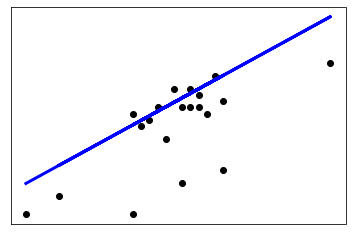

In [597]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# defining features
df_X = df[["MP"]].to_numpy()

# target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

# Plot outputs 
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

For MP effect on PTS
Coefficients: 
 [[0.71636207]]
Mean squared error: 40.47
Coefficient of determination: 0.16


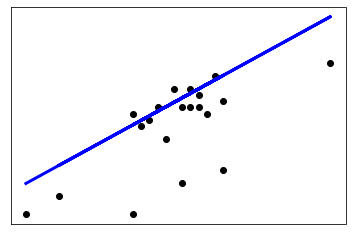

For FG% effect on PTS
Coefficients: 
 [[42.79551538]]
Mean squared error: 85.28
Coefficient of determination: -0.76


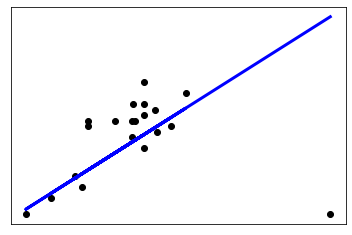

For PTS effect on PTS
Coefficients: 
 [[1.]]
Mean squared error: 0.00
Coefficient of determination: 1.00


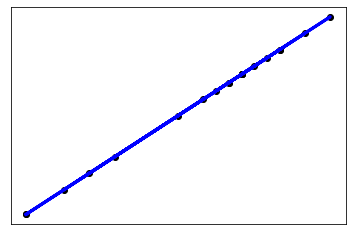

For FT% effect on PTS
Coefficients: 
 [[7.09747651]]
Mean squared error: 36.21
Coefficient of determination: 0.25


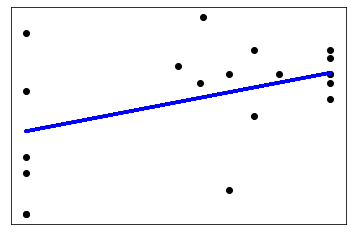

For TRB effect on PTS
Coefficients: 
 [[2.23170732]]
Mean squared error: 38.49
Coefficient of determination: 0.21


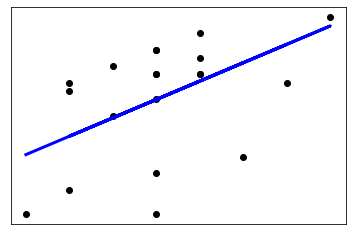

For AST effect on PTS
Coefficients: 
 [[3.19494048]]
Mean squared error: 62.02
Coefficient of determination: -0.28


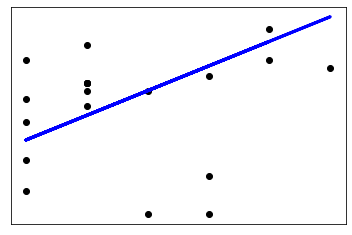

For STL effect on PTS
Coefficients: 
 [[1.70045045]]
Mean squared error: 42.76
Coefficient of determination: 0.12


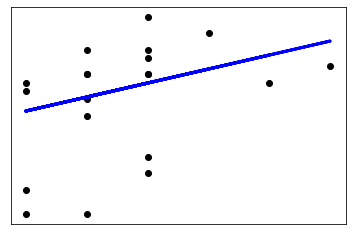

For BLK effect on PTS
Coefficients: 
 [[3.32916667]]
Mean squared error: 48.56
Coefficient of determination: -0.00


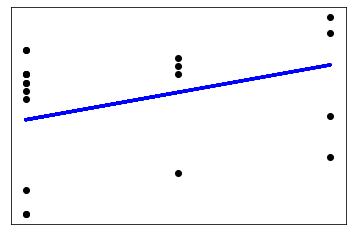

For TOV effect on PTS
Coefficients: 
 [[-1.00911854]]
Mean squared error: 52.86
Coefficient of determination: -0.09


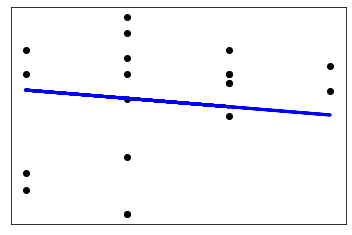

In [598]:
# Checking all features one by one with FOR loop 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

features = ["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]

for element in features: 
    print("For", element, "effect on PTS")
    # # defining features
    df_X = df[[element]].to_numpy()

    # # target variable
    df_y = df[['PTS']].to_numpy()

    # Split the data into training/testing sets
    df_X_train = df_X[:-20]
    df_X_test = df_X[-20:]

    # Split the targets into training/testing sets
    df_y_train = df_y[:-20]
    df_y_test = df_y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(df_X_train, df_y_train)

    # Make predictions using the testing set
    df_y_pred = regr.predict(df_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)

    # The mean squared error
    print('Mean squared error: %.2f'
         % mean_squared_error(df_y_test, df_y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
         % r2_score(df_y_test, df_y_pred))

    # Plot outputs 
    plt.scatter(df_X_test, df_y_test, color='black')
    plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [599]:
# Adding more features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "AST", "TRB"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

df

Coefficients: 
 [[ 0.34830615 24.04121937  1.31803432  0.99046662]]
Mean squared error: 36.98
Coefficient of determination: 0.24


,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,23,0.417,1.000,1,1,2,0,3,17
1,22,0.583,0.000,3,1,0,1,1,16
2,24,0.706,0.000,4,3,2,1,0,27
3,28,0.375,0.750,3,1,0,0,3,10
4,18,0.250,1.000,3,1,0,1,0,3
5,21,0.471,0.000,8,0,0,1,0,18
6,35,0.500,1.000,3,3,0,1,1,21
7,22,0.333,0.667,4,2,0,0,4,10
8,13,0.000,0.000,3,0,1,0,0,0
9,41,0.529,1.000,7,1,1,1,0,29


In [600]:
# Adding all the features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[ 0.19550688 26.39332963  4.06953266  1.15555359  1.27714567  1.51048203
   0.51788235 -0.08715952]]
Mean squared error: 35.40
Coefficient of determination: 0.27


In [601]:
# Calculating R-squared score, mean absolute error, and mean squared error for linear regression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("For LINEAR REGRESSION MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, df_y_pred), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, df_y_pred), '\n',
      "R-squared score is:", r2_score(df_y_test, df_y_pred))


For LINEAR REGRESSION MODEL 
Mean absolute error is: 4.258862658791152 
 Mean squared error is: 35.396919424873055 
 R-squared score is: 0.26937572785235453


Prediction: [19.97290084] vs. Actual: [21]
Prediction: [25.73833589] vs. Actual: [26]
Prediction: [19.6992826] vs. Actual: [21]
Prediction: [33.70592598] vs. Actual: [28]
Prediction: [9.80253762] vs. Actual: [4]
Prediction: [20.20819962] vs. Actual: [24]
Prediction: [11.6302648] vs. Actual: [19]
Prediction: [27.61089634] vs. Actual: [22]
Prediction: [23.84158216] vs. Actual: [24]
Prediction: [4.98623365] vs. Actual: [7]
Prediction: [24.99510922] vs. Actual: [20]
Prediction: [30.33282005] vs. Actual: [23]
Prediction: [18.84251811] vs. Actual: [21]
Prediction: [17.63460998] vs. Actual: [20]
Prediction: [17.0764956] vs. Actual: [9]
Prediction: [19.03538476] vs. Actual: [18]
Prediction: [16.43655643] vs. Actual: [11]
Prediction: [17.99140804] vs. Actual: [16]
Prediction: [21.14764351] vs. Actual: [21]
Prediction: [22.59640327] vs. Actual: [4]


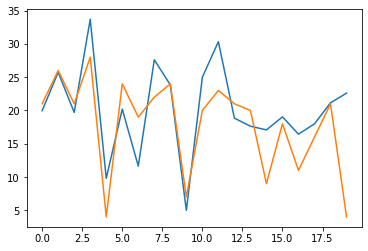

In [602]:
# Printing predicted and actual values

for i in range(len(df_y_test)):
    print("Prediction:", df_y_pred[i], "vs. Actual:", df_y_test[i])

plt.plot(df_y_pred)
plt.plot(df_y_test)

## Statsmodel for Linear Regression

In [603]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [604]:
mod = sm.OLS(df_y, df_X) #describe model
res = mod.fit() #fit model
print(res.summary()) #summarize model

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              80.82
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                    2.89e-20
Time:                        14:56:20   Log-Likelihood:                         -125.00
No. Observations:                  43   AIC:                                      266.0
Df Residuals:                      35   BIC:                                      280.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [605]:
res.params

array([ 2.24814766e-01,  1.24607017e+01,  5.06735698e+00,  6.45453023e-01,
       -3.86344022e-02,  7.11584546e-01, -8.98662804e-03, -5.71127070e-01])

In [606]:
print("R-squared:", res.rsquared)

R-squared: 0.9486500438417056


In [607]:
# Apply Rainbow test for linearity
sm.stats.linear_rainbow(res)

# first number is an F-statistic and that the second is the p-value

(2.2380676618430666, 0.06788923011378827)

- Z-score calculated from our p-value(0.0678) is 1.50. Since it is lower than 1.96, we cannot deny H0. We can say that there is no difference in the accuracy or performance among the models selected.

## Lasso Model

In [608]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# summarize shape
print(df.shape)
# summarize first few lines
print(df.head())

(43, 9)
   MP    FG%   FT%  TRB  AST  STL  BLK  TOV  PTS
0  23  0.417  1.00    1    1    2    0    3   17
1  22  0.583  0.00    3    1    0    1    1   16
2  24  0.706  0.00    4    3    2    1    0   27
3  28  0.375  0.75    3    1    0    0    3   10
4  18  0.250  1.00    3    1    0    1    0    3


In [609]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 4.371 (1.725)


In [610]:
df.tail(10)

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
33,29,0.571,1.000,2,2,4,0,2,20
34,37,0.529,1.000,5,5,2,1,1,23
35,35,0.474,0.667,4,1,1,0,1,21
36,38,0.350,0.571,7,1,0,0,2,20
37,35,0.333,0.000,4,3,2,1,0,9
38,30,0.467,1.000,4,1,1,0,1,18
39,40,0.313,0.000,6,0,2,2,1,11
40,33,0.500,0.750,3,0,1,2,2,16
41,37,0.467,0.833,4,1,2,0,2,21
42,16,1.000,0.000,1,2,0,0,1,4


In [611]:
df_y_test

array([[21],
       [26],
       [21],
       [28],
       [ 4],
       [24],
       [19],
       [22],
       [24],
       [ 7],
       [20],
       [23],
       [21],
       [20],
       [ 9],
       [18],
       [11],
       [16],
       [21],
       [ 4]], dtype=int64)

In [612]:
#define model 
model = Lasso(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
yhat = model.predict(df_X_test)
yhat

array([18.62124652, 22.80295581, 21.01079469, 31.60634216, 16.68242947,
       20.86413877, 17.58389172, 23.10703101, 19.66936468, 11.01263426,
       16.38911763, 21.60818173, 20.26675172, 22.49888061, 20.26675172,
       17.27981652, 23.54699877, 18.92532172, 21.46152581,  8.47643017])

Prediction: 18.62124651935579 vs. Actual: [21]
Prediction: 22.802955810889305 vs. Actual: [26]
Prediction: 21.01079468594637 vs. Actual: [21]
Prediction: 31.60634215612866 vs. Actual: [28]
Prediction: 16.682429473688746 vs. Actual: [4]
Prediction: 20.86413876522226 vs. Actual: [24]
Prediction: 17.583891715535824 vs. Actual: [19]
Prediction: 23.10703101108874 vs. Actual: [22]
Prediction: 19.66936468192697 vs. Actual: [24]
Prediction: 11.012634257411726 vs. Actual: [7]
Prediction: 16.389117632240534 vs. Actual: [20]
Prediction: 21.608181727594015 vs. Actual: [23]
Prediction: 20.266751723574618 vs. Actual: [21]
Prediction: 22.498880610689877 vs. Actual: [20]
Prediction: 20.266751723574618 vs. Actual: [9]
Prediction: 17.279816515336393 vs. Actual: [18]
Prediction: 23.54699877326106 vs. Actual: [11]
Prediction: 18.925321719555225 vs. Actual: [16]
Prediction: 21.461525806869908 vs. Actual: [21]
Prediction: 8.47643017009704 vs. Actual: [4]


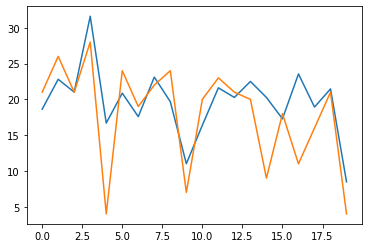

In [613]:
for i in range(len(df_y_test)):
    print("Prediction:", yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(yhat)
plt.plot(df_y_test)

In [614]:
print("For LASSO MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, yhat))

For LASSO MODEL 
Mean absolute error is: 3.825483764831813 
 Mean squared error is: 28.655085167140964 
 R-squared score is: 0.4085332542000937


## Ridge Regression Model

In [615]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 4.049 (1.462)


In [616]:
data = df.values
X, y = data[:, :-1], data[:, -1]
#define model 
model = Ridge(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
ridge_yhat = model.predict(df_X_test)
ridge_yhat

array([20.45745493, 21.6098555 , 22.07615245, 31.13714041, 11.65046049,
       21.53060205, 13.43089735, 22.82567233, 21.35419446,  9.19521457,
       20.07226584, 24.43381171, 20.01516875, 21.54171141, 16.06702108,
       19.40999461, 19.17990913, 18.38017749, 22.04980123, 11.4514729 ])

Prediction: 20.457454934378994 vs. Actual: [21]
Prediction: 21.60985550464335 vs. Actual: [26]
Prediction: 22.07615244631212 vs. Actual: [21]
Prediction: 31.137140412051547 vs. Actual: [28]
Prediction: 11.650460485220716 vs. Actual: [4]
Prediction: 21.530602050833387 vs. Actual: [24]
Prediction: 13.43089735408675 vs. Actual: [19]
Prediction: 22.82567232705751 vs. Actual: [22]
Prediction: 21.35419445715846 vs. Actual: [24]
Prediction: 9.195214570870835 vs. Actual: [7]
Prediction: 20.072265843118597 vs. Actual: [20]
Prediction: 24.433811710830433 vs. Actual: [23]
Prediction: 20.015168750668746 vs. Actual: [21]
Prediction: 21.541711414624462 vs. Actual: [20]
Prediction: 16.067021077003275 vs. Actual: [9]
Prediction: 19.40999460993745 vs. Actual: [18]
Prediction: 19.179909132778477 vs. Actual: [11]
Prediction: 18.380177486536716 vs. Actual: [16]
Prediction: 22.049801232728765 vs. Actual: [21]
Prediction: 11.45147289546243 vs. Actual: [4]


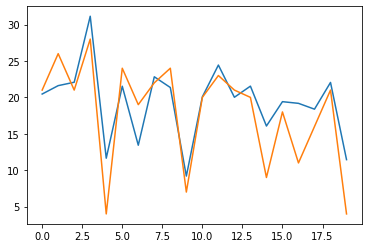

In [617]:
for i in range(len(df_y_test)):
    print("Prediction:", ridge_yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(ridge_yhat)
plt.plot(df_y_test)

In [618]:
print("For RIDGE MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, ridge_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, ridge_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, ridge_yhat))

For RIDGE MODEL 
Mean absolute error is: 3.103631629638182 
 Mean squared error is: 16.262610439700133 
 R-squared score is: 0.6643250850982996


## Random Forest Model

In [619]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.1


- The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [620]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

data = df.values
X, y = data[:, :-1], data[:, -1]
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 3.811 (1.650)


In [621]:
# Making predictions
# fit the model on the whole dataset
model.fit(X, y)

# putting new row from test dataset
random_yhat = model.predict(df_X_test)
random_yhat

array([19.85, 24.52, 18.12, 26.37,  6.43, 23.1 , 18.15, 22.15, 23.03,
        7.14, 19.72, 23.35, 21.75, 18.09, 11.41, 18.98, 12.32, 17.83,
       21.71,  7.29])

Prediction: 19.85 vs. Actual: [21]
Prediction: 24.52 vs. Actual: [26]
Prediction: 18.12 vs. Actual: [21]
Prediction: 26.37 vs. Actual: [28]
Prediction: 6.43 vs. Actual: [4]
Prediction: 23.1 vs. Actual: [24]
Prediction: 18.15 vs. Actual: [19]
Prediction: 22.15 vs. Actual: [22]
Prediction: 23.03 vs. Actual: [24]
Prediction: 7.14 vs. Actual: [7]
Prediction: 19.72 vs. Actual: [20]
Prediction: 23.35 vs. Actual: [23]
Prediction: 21.75 vs. Actual: [21]
Prediction: 18.09 vs. Actual: [20]
Prediction: 11.41 vs. Actual: [9]
Prediction: 18.98 vs. Actual: [18]
Prediction: 12.32 vs. Actual: [11]
Prediction: 17.83 vs. Actual: [16]
Prediction: 21.71 vs. Actual: [21]
Prediction: 7.29 vs. Actual: [4]


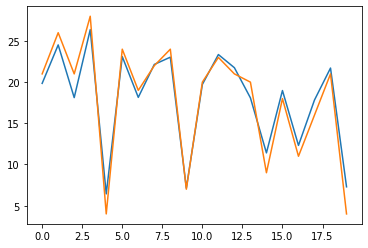

In [622]:
for i in range(len(df_y_test)):
    print("Prediction:", random_yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(random_yhat)
plt.plot(df_y_test)

In [623]:
print("For RANDOM FOREST MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, random_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, random_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, random_yhat))

For RANDOM FOREST MODEL 
Mean absolute error is: 1.3204999999999998 
 Mean squared error is: 2.5242049999999994 
 R-squared score is: 0.9478981371587801
